In [1]:
# import packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm


In [2]:
df = pd.read_csv("advertising.csv")
print("Rows,Columns:",df.shape)

Rows,Columns: (200, 4)


In [3]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


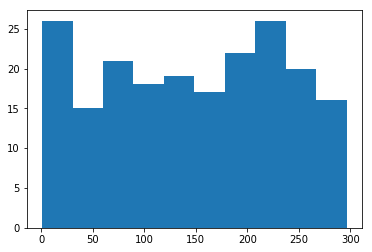

In [8]:
plt.hist(df["TV"])
plt.show()

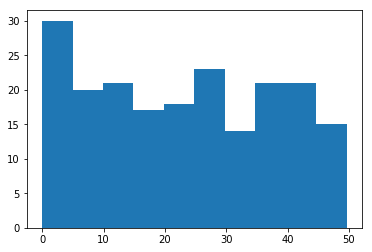

In [9]:
plt.hist(df["radio"])
plt.show()

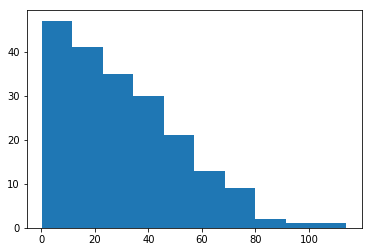

In [10]:
plt.hist(df["newspaper"])
plt.show()

In [34]:
from sklearn.model_selection import train_test_split #splitting the data in 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(
  df[["TV", "radio", "newspaper"]],
  df.sales,
  test_size=0.3,
  random_state = 42 )

In [35]:
len( X_train ) #length of the training data

140

In [36]:
len( X_test )  #length of testing data

60

# Linear Regression 

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.044059280957465197),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.0068824522222754583)]

In [43]:
linreg.intercept_

2.7089490925159101

total sales =  2.708 + 0.044 TV + 0.199 Radio + 0.006 * Newspaper

# Prediction on test dataset

In [45]:
y_pred = linreg.predict( X_test )

In [47]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),  #comparing predicted values with actual values
                            'residuals': y_test - y_pred } )

In [48]:
test_pred_df[0:10]

,actual,predicted,residuals
95,16.9,16.57,0.334604
15,22.4,21.19,1.211772
30,21.4,21.55,-0.151071
158,7.3,10.89,-3.589238
128,24.7,22.20,2.497680
115,12.6,13.36,-0.755569
69,22.3,21.20,1.103075
170,8.4,7.35,1.049715
174,11.5,13.28,-1.775471
45,14.9,15.12,-0.224495


# Calculating the RMSE

In [49]:
#importing packages
from sklearn import metrics 

In [50]:
#Calculating the rmse
#The lesser the RMSE value, the better is the model.
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) ) 

In [51]:
#rounding it off
round( rmse, 2 ) 

1.95

In [59]:
#Calculating r2
#r2 is a measure of how close the data is to the regression line
metrics.r2_score( y_test, y_pred ) 

0.96613357132365041

# Looking at Residuals

In [77]:
#importing packages
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: Qt5Agg


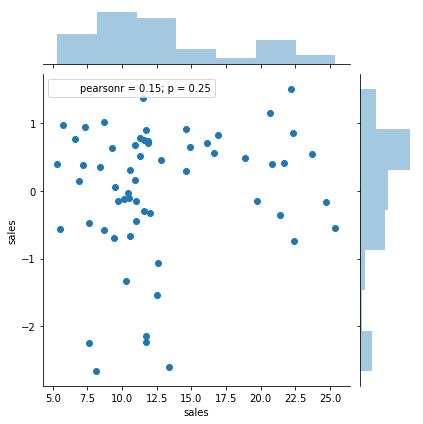

In [65]:
residuals = y_test - y_pred
sn.jointplot(  df.sales, residuals, size = 6 )

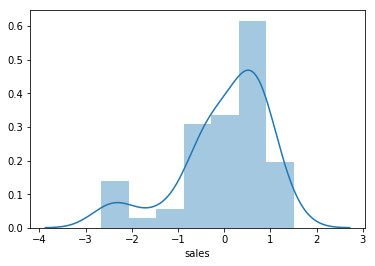

In [66]:
sn.distplot( residuals )

# Creating new features

In [54]:
#creating new features to check if we can find some relationship to decrease the costs and increase profits
X_train['tv_radio'] = X_train.TV * X_train.radio
X_test['tv_radio'] = X_test.TV * X_test.radio

In [55]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
y_pred = linreg.predict( X_test )

In [57]:
metrics.r2_score(y_test, y_pred)

0.96613357132365041

In [67]:
residuals = y_test - y_pred

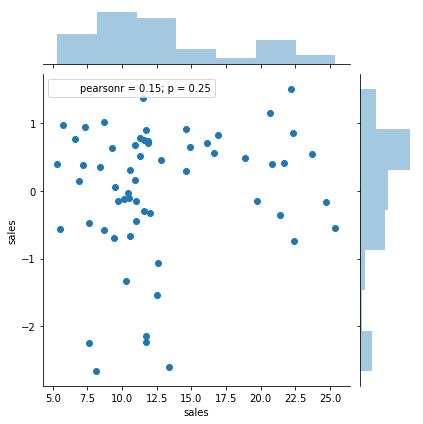

In [69]:
sn.jointplot( df.sales, residuals, size = 6 )

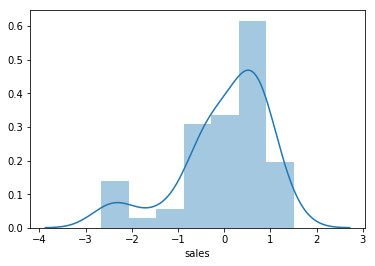

In [70]:
sn.distplot( residuals )

# K-Fold Cross Validation

In [72]:
#Trying to asses the performance of the model outside of the sample dataset.
#In K-fold cross validation we run k separate learning experiments.
from sklearn.model_selection import cross_val_score 

In [74]:
linreg = LinearRegression()

In [75]:
cv_scores = cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 ) #k = 10, size= 200
cv_scores

array([ 0.95903494,  0.9876863 ,  0.95936288,  0.9869768 ,  0.94930993,
        0.98115182,  0.96756731,  0.98532576,  0.83492477,  0.96338315])

In [76]:
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) ) #taking the average from k (10) experiments
print( "Standard deviation in r2 score: ", np.round( np.std( cv_scores ), 2) ) #deviation in r2

Average r2 score:  0.96
Standard deviation in r2 score:  0.04
